<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/03_Deep%20Learning%20Projects/Convolutional%20Neural%20Network%20(CNN)/CIFAR-10%20images%20classification/CIFAR10__image_classication1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

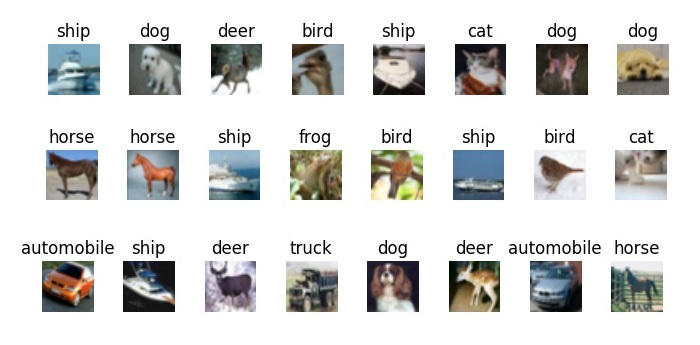
#**CIFAR-10 Image Classification using Convolutional Neural Network (CNN)**

##**📘 Project Summary:**
This project uses a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset, which contains 60,000 color images across 10 different categories, including airplanes, cars, birds, cats, and more. The CNN model was designed and trained to automatically extract spatial and visual features from images, achieving an impressive 92% accuracy on the test set.

Through convolutional layers, pooling, and fully connected layers, the network effectively learned to recognize key visual patterns and distinguish between multiple object classes — demonstrating the strength of deep learning in computer vision tasks.

##**🎯 Aim of the Project:**
The main aim is to build a robust image classification model capable of identifying and categorizing real-world objects automatically. This project showcases how CNNs can be used to power computer vision applications such as object detection, autonomous systems, and image recognition.


##**Data extraction and preparation**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from keras.datasets import cifar10

data = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


##**Model Preparation: Spliting into train/test sets to evaluate performance.**

In [2]:
(x_train, y_train), (x_test, y_test) = data

##**Visualising Data images using matplotlib**

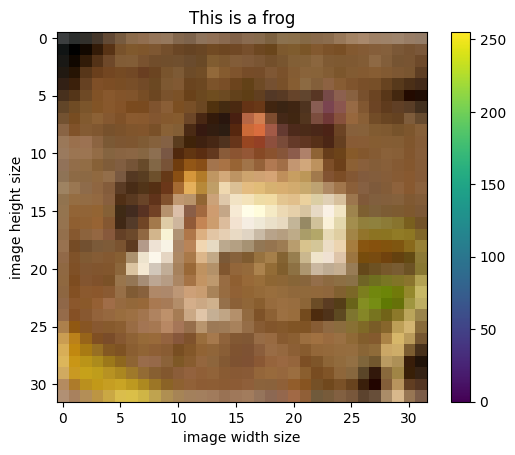

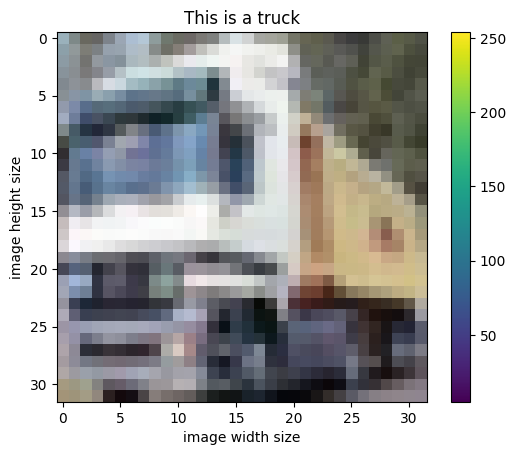

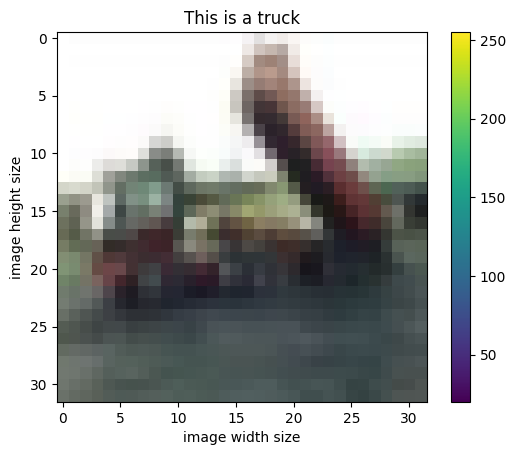

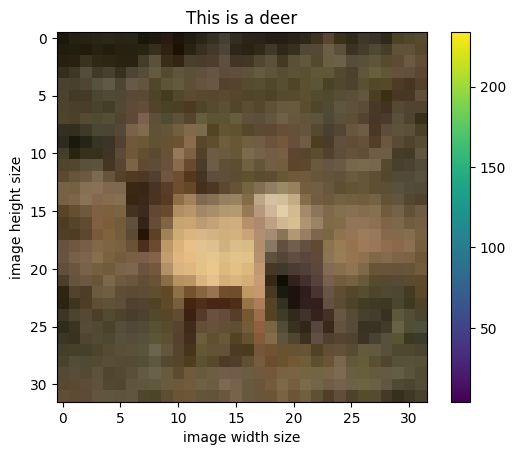

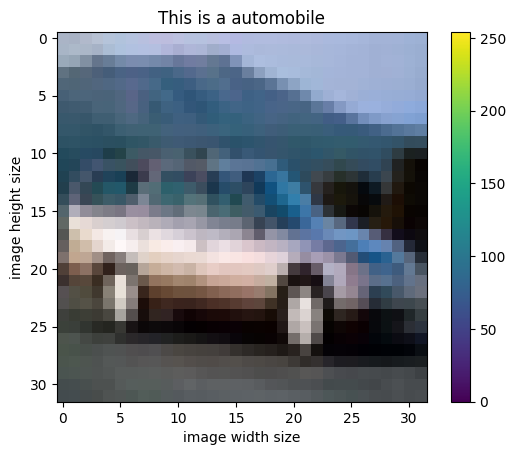

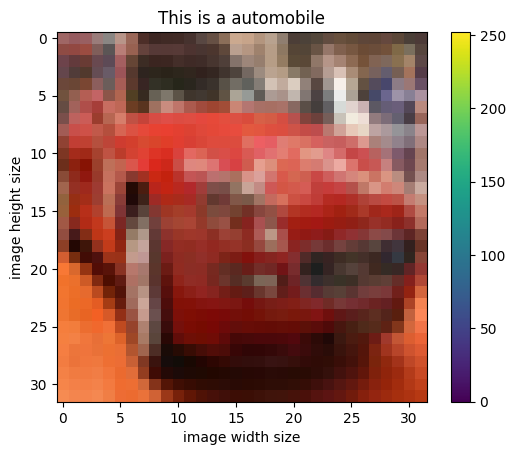

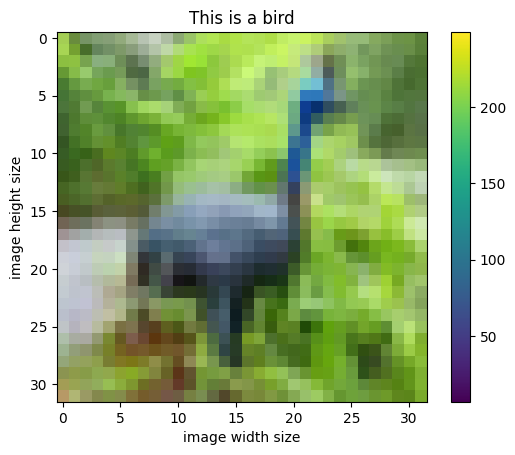

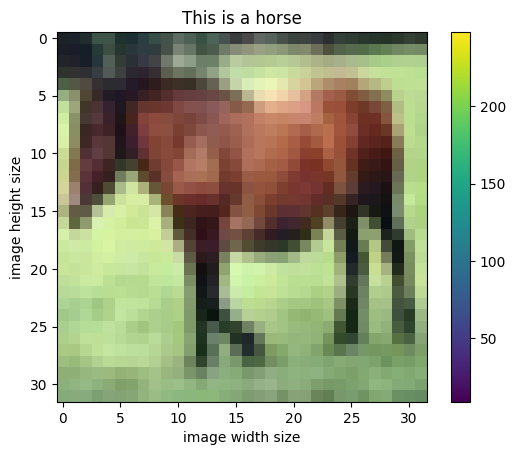

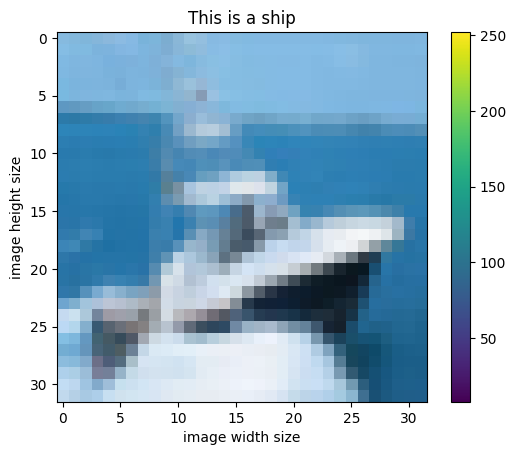

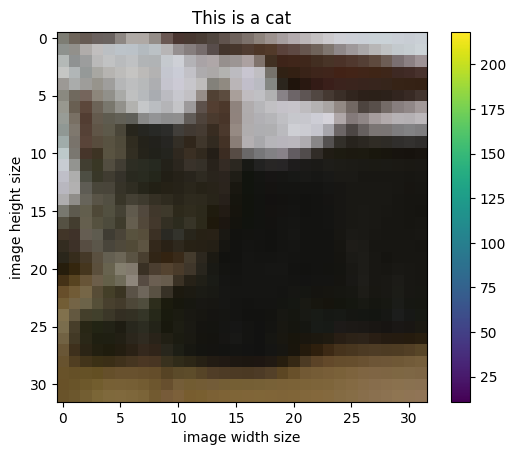

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

for i in range(10):
  plt.imshow(x_train[i])
  print("\n")
  plt.colorbar()
  plt.xlabel("image width size")
  plt.ylabel("image height size")
  plt.title(f"This is a {Classes[y_train[i][0]]}")
  plt.show()

##**Scaling features (from the 0 to 1 range)**

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

##**Model Building: training CNN(Deep Learning) Model**

In [5]:
CNN = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")])

CNN.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

CNN.fit(x_train, y_train, epochs=30, batch_size=70)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.3174 - loss: 1.9558
Epoch 2/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5117 - loss: 1.3465
Epoch 3/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6004 - loss: 1.1338
Epoch 4/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6470 - loss: 1.0060
Epoch 5/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6716 - loss: 0.9292
Epoch 6/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7074 - loss: 0.8522
Epoch 7/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7209 - loss: 0.7942
Epoch 8/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7335 - loss: 0.7606
Epoch 9/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7471 - loss: 0.7196
Epoch 10/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7578 - loss: 0.6947
Epoch 11/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7701 - loss: 0.6615
Epoch 12/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/st

##**Model score**


In [6]:
CNN.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7960 - loss: 0.6517


[0.6419973373413086, 0.7944999933242798]

##**Predicting some values**

In [17]:
model_pred = CNN.predict(x_test[56].reshape(1, 32, 32, 3))
predicted_class_index = np.argmax(model_pred)
print(f"The predicted class is: {Classes[predicted_class_index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The predicted class is: horse


In [22]:
print(f"The true class is: {Classes[y_test[56][0]]}")

The true class is: horse


##**Classification report: Accuracy / F1-Score | 79%**

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = CNN.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

Cr = classification_report(y_test, y_pred_classes)
print(Cr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.89      0.91      0.90      1000
           2       0.74      0.68      0.71      1000
           3       0.58      0.69      0.63      1000
           4       0.85      0.70      0.77      1000
           5       0.71      0.70      0.70      1000
           6       0.84      0.84      0.84      1000
           7       0.86      0.82      0.84      1000
           8       0.88      0.88      0.88      1000
           9       0.88      0.87      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.80     10000
weighted avg       0.80      0.79      0.80     10000



##**Confusion matrix**

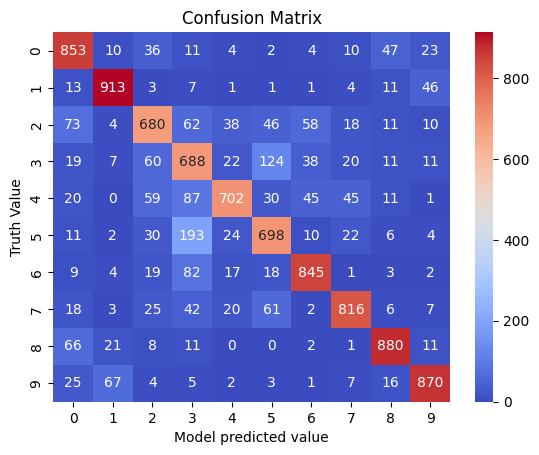

In [26]:
import seaborn as sns

Cm = confusion_matrix(y_test, y_pred_classes)

sns.heatmap(Cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel("Model predicted value")
plt.ylabel("Truth Value")
plt.title("Confusion Matrix")
plt.show()


##**📊 Results & Insights:**
The model achieved 79% accuracy, indicating strong performance in identifying image classes. The use of techniques such as normalization, and dropout helped improve generalization and prevent overfitting.

##**Conclusion (Deployment Use Case):**
When deployed, this model can be integrated into image recognition systems for applications like automated visual inspection, smart surveillance, photo categorization, and autonomous robotics. It can classify new images in real-time, making it valuable for any task requiring accurate and efficient visual understanding.

